In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

import glob, os
import json

import MySQLdb 
import sshtunnel
from sshtunnel import SSHTunnelForwarder
from sklearn.metrics import mean_absolute_error, mean_squared_error
#from datetime import date 
from datetime import datetime

pd.set_option('float_format', '{:f}'.format)

import pandas as pd
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import MySQLdb 
import numpy as np

In [2]:
ieo = pd.DataFrame()
price = pd.DataFrame()
grades = pd.DataFrame()


conn = MySQLdb.connect(host='tokenmetrics-restored-27-05.cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')
cursor = conn.cursor()

query = '''SELECT * FROM icos;'''
data = pd.read_sql_query(query, conn)
ieo = pd.concat([ieo,data])

query = 'SELECT * FROM ico_price_daily_summaries where currency ="USD";'
data = pd.read_sql_query(query, conn)
price = pd.concat([price,data])

query = 'SELECT * FROM ico_ml_grade_history;'
data = pd.read_sql_query(query, conn)
grades = pd.concat([grades,data])
    
conn.close() 

In [4]:
ieo.sort_values('ico_market_cap', ascending=False, inplace=True)
ieo = ieo.drop(ieo[ieo['id'] == 3245].index)
ieo = ieo[:150]
ieo['weight'] = ieo['ico_market_cap'] / ieo['ico_market_cap'].sum()
ieo = pd.merge(ieo,price[['ico_id','ico_symbol']], left_on='id',right_on='ico_id',how='inner')
ieo = ieo.drop_duplicates('id')
weight = ieo[['ico_symbol','weight']]
weight = weight.sort_values('ico_symbol')

ieos = ieo['id'][:150]
df = price[price['ico_id'].isin(ieos)]
df = df.drop_duplicates(subset=['ico_symbol','date']).sort_values(by='date')


#temp = temp.dropna()

In [5]:
temp = df['close'].groupby([df['date'],df['ico_symbol']]).mean()
temp = temp.unstack().sort_index()
temp.index = pd.to_datetime(temp.index)

In [7]:
col = temp.loc['2019-01-01':].isnull().sum() <= 400

In [8]:
col = col[col == True]

In [9]:
col = col.index.tolist()

In [10]:
temp[col].loc['2019-01-01':]

ico_symbol,ABBC,ADA,ALGO,ATOM,BAT,BCD,BCH,BCN,BNB,BNT,...,XEM,XIN,XLM,XMR,XRP,XTZ,XVG,ZB,ZEC,ZRX
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,nan,0.040550,nan,nan,0.127000,nan,148.289993,0.000693,6.111100,0.610370,...,0.063597,nan,0.110020,45.830002,0.348640,0.449690,0.006826,nan,55.689999,0.291770
2019-01-02,nan,0.041940,nan,nan,0.127000,nan,162.020004,0.000708,5.991000,0.642380,...,0.065097,nan,0.113510,47.660000,0.360800,0.458160,0.006811,nan,58.630001,0.311820
2019-01-03,nan,0.044330,nan,nan,0.136000,nan,168.759995,0.000703,6.051000,0.689080,...,0.066084,nan,0.116560,51.360001,0.368800,0.460340,0.007138,nan,60.020000,0.324250
2019-01-04,nan,0.042050,nan,nan,0.131000,nan,158.559998,0.000695,5.794700,0.658490,...,0.064155,nan,0.111390,48.990002,0.352400,0.454590,0.006880,nan,57.509998,0.316810
2019-01-05,nan,0.043010,nan,nan,0.136000,nan,157.919998,0.000680,5.968800,0.685560,...,0.063935,nan,0.112710,49.630001,0.353080,0.447480,0.006766,nan,57.660000,0.316670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,0.180704,0.148422,0.321433,3.803860,0.254052,0.860478,246.858887,0.000232,19.509974,1.425493,...,0.049534,177.343719,0.098641,77.982201,0.215089,2.982881,0.006319,0.230281,65.699615,0.384996
2020-07-27,0.187083,0.138627,0.287504,3.596614,0.247313,0.868255,268.334900,0.000246,19.727266,1.346027,...,0.049624,176.027420,0.094474,78.638985,0.223870,2.818909,0.006036,0.237679,70.749931,0.366377
2020-07-28,0.163753,0.148026,0.313084,3.756370,0.251851,0.902013,288.426025,0.000238,20.179308,1.482241,...,0.051024,178.879120,0.097200,81.382454,0.230110,2.837935,0.005929,0.234784,70.999969,0.383363


In [11]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(temp[col].loc['2019-01-01':])
S = risk_models.sample_cov(temp[col].loc['2019-01-01':])

# Optimise for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('ABBC', 0.0), ('ADA', 0.0), ('ALGO', 0.0), ('ATOM', 0.0), ('BAT', 0.0), ('BCD', 0.0), ('BCH', 0.0), ('BCN', 0.0), ('BNB', 0.0), ('BNT', 0.0), ('BSV', 0.0), ('BTC', 0.0), ('BTG', 0.0), ('BTM', 0.0), ('BTT', 0.0), ('CCC', 0.00998), ('CENNZ', 0.03094), ('CRO', 0.0), ('DAI', 0.0), ('DASH', 0.0), ('DCR', 0.0), ('DGB', 0.0), ('DOGE', 0.0), ('EKT', 0.0), ('ELA', 0.0), ('ENJ', 0.01758), ('EON', 0.0), ('EOS', 0.0), ('ETC', 0.0), ('ETH', 0.0), ('GAP', 0.0), ('GXC', 0.0), ('HBAR', 0.01323), ('HC', 0.0), ('HEDG', 0.0), ('HOT', 0.0), ('HT', 0.0), ('ICX', 0.0), ('INB', 0.0473), ('INO', 0.0), ('IOST', 0.0), ('KBC', 0.0), ('KCS', 0.0), ('KIN', 0.0), ('KMD', 0.0), ('KNC', 0.02083), ('LEO', 0.03986), ('LINK', 0.02187), ('LSK', 0.0), ('LTC', 0.0), ('MCO', 0.0), ('MIN', 0.0036), ('MIOTA', 0.0), ('MKR', 0.0), ('MONA', 0.0), ('NANO', 0.0), ('NEO', 0.0), ('NEXO', 0.0), ('NGC', 0.0), ('OMG', 0.0), ('ONE', 0.0119), ('ONT', 0.0), ('PAX', 0.0), ('QTUM', 0.0), ('REN', 0.0), ('REP', 0.0), ('RVN', 0.0

C:\Users\Aagam\Anaconda3\lib\site-packages\pypfopt\risk_models.py:68: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


(0.7124517894056355, 0.24553022177502534, 2.820230374899086)

In [12]:
weights = pd.DataFrame.from_dict(dict(cleaned_weights), orient='index')
weights = weights[weights[0] > 0]

In [13]:
weights

,0
CCC,0.009980
CENNZ,0.030940
ENJ,0.017580
HBAR,0.013230
INB,0.047300
KNC,0.020830
LEO,0.039860
LINK,0.021870
MIN,0.003600
ONE,0.011900


In [14]:
w_mkt =  np.array([weights[0]]).T
print (np.around(w_mkt, 6))

lmda = 2.7
tau = 0.05

[[0.00998]
 [0.03094]
 [0.01758]
 [0.01323]
 [0.0473 ]
 [0.02083]
 [0.03986]
 [0.02187]
 [0.0036 ]
 [0.0119 ]
 [0.01476]
 [0.10358]
 [0.66323]
 [0.00132]]


#### Correlation

In [15]:
temp = pd.DataFrame()

conn = MySQLdb.connect(host='tokenmetrics-restored-27-05.cxuzrhvtziar.us-east-1.rds.amazonaws.com', user='admin', passwd='WiG8Rled2cTvZ5JibJui',db='tokenmetrics')
cursor = conn.cursor()

query = 'SELECT * FROM ico_price_daily_summaries where ico_symbol IN '+ str(tuple(weights.index)) +' and currency = "USD";'
data = pd.read_sql_query(query, conn)
temp = pd.concat([temp,data])
    
conn.close() 

In [16]:
temp = temp['close'].groupby([temp['date'],temp['ico_symbol']]).mean()
temp = temp.unstack().sort_index()
temp.index = pd.to_datetime(temp.index)

In [17]:
temp = temp.loc['2019-01-01':]

In [18]:
corr = temp.corr('pearson')
corr.fillna(0, inplace=True)
corr

ico_symbol,CCC,CENNZ,ENJ,HBAR,INB,KNC,LEO,LINK,MIN,ONE,SEELE,SNX,TUSD,VEE
ico_symbol,,,,,,,,,,,,,,
CCC,1.000000,0.661528,-0.553747,-0.674766,0.075513,-0.520826,-0.688281,-0.516028,0.348605,0.219104,0.706951,-0.011187,0.297461,0.000000
CENNZ,0.661528,1.000000,-0.150676,-0.175133,0.506260,-0.181912,-0.383710,-0.175739,-0.101942,0.535972,0.561752,0.187317,0.169666,0.131639
ENJ,-0.553747,-0.150676,1.000000,0.495233,0.225310,0.590667,0.399753,0.785029,-0.435757,0.338773,-0.337184,0.539739,0.013775,0.083941
HBAR,-0.674766,-0.175133,0.495233,1.000000,0.061787,0.525637,0.682030,0.619895,-0.400995,-0.055766,-0.553507,0.097411,-0.301457,0.031896
INB,0.075513,0.506260,0.225310,0.061787,1.000000,0.293354,0.028040,0.635191,-0.437541,0.787134,-0.067406,0.627561,0.012832,0.039945
KNC,-0.520826,-0.181912,0.590667,0.525637,0.293354,1.000000,0.049909,0.884317,-0.631669,0.349925,-0.563505,0.751218,-0.038235,0.034911
LEO,-0.688281,-0.383710,0.399753,0.682030,0.028040,0.049909,1.000000,0.738222,-0.410183,0.104686,-0.566267,0.351489,-0.180164,0.034935
LINK,-0.516028,-0.175739,0.785029,0.619895,0.635191,0.884317,0.738222,1.000000,-0.587992,0.491333,-0.592547,0.733205,-0.146769,1.000000
MIN,0.348605,-0.101942,-0.435757,-0.400995,-0.437541,-0.631669,-0.410183,-0.587992,1.000000,-0.501304,0.352191,-0.506416,0.127490,0.000000


#### Covariance

In [21]:
temp_log = np.log(temp)

In [22]:
std = temp_log.std(axis=0)

In [23]:
std

ico_symbol
CCC     0.778040
CENNZ   0.487550
ENJ     0.468062
HBAR    0.438742
INB     0.326545
KNC     0.675365
LEO     0.197424
LINK    0.400808
MIN     0.493153
ONE     0.384211
SEELE   0.426017
SNX     0.522677
TUSD    0.005815
VEE     0.516587
dtype: float64

In [34]:
correlation = np.array(corr)
stdev = std
cov1 = correlation * np.dot(stdev.T, stdev)
cov2 = correlation * np.dot(stdev, stdev.T)

In [52]:
correlation = np.array(corr)
temp = temp.pct_change()
std = temp.std(axis=0)
stdev = std * np.sqrt(365)
stdev = stdev / stdev.max()
cov = correlation * np.dot(stdev.T, stdev)

In [31]:
stdev

ico_symbol
CCC     0.778040
CENNZ   0.487550
ENJ     0.468062
HBAR    0.438742
INB     0.326545
KNC     0.675365
LEO     0.197424
LINK    0.400808
MIN     0.493153
ONE     0.384211
SEELE   0.426017
SNX     0.522677
TUSD    0.005815
VEE     0.516587
dtype: float64

In [36]:
cov2

array([[ 3.12939678,  2.07018356, -1.73289493, -2.11161137,  0.23630937,
        -1.62987082, -2.15390495, -1.61485788,  1.09092206,  0.68566248,
         2.21232922, -0.03500881,  0.9308724 ,  0.        ],
       [ 2.07018356,  3.12939678, -0.47152388, -0.54806218,  1.58428819,
        -0.56927343, -1.20078099, -0.54995764, -0.31901823,  1.67726984,
         1.75794352,  0.58618977,  0.53095291,  0.41195156],
       [-1.73289493, -0.47152388,  3.12939678,  1.54978138,  0.70508456,
         1.84843012,  1.25098648,  2.45666667, -1.36365508,  1.06015582,
        -1.05518217,  1.68905737,  0.04310632,  0.2626862 ],
       [-2.11161137, -0.54806218,  1.54978138,  3.12939678,  0.19335516,
         1.64492735,  2.13434176,  1.93989745, -1.25487168, -0.17451512,
        -1.73214404,  0.30483734, -0.94337828,  0.09981648],
       [ 0.23630937,  1.58428819,  0.70508456,  0.19335516,  3.12939678,
         0.91802152,  0.08774825,  1.98776381, -1.36923855,  2.46325462,
        -0.2109413 ,  1.96

### Equilibrium Returns

In [33]:
r_eq = lmda*np.dot(cov, w_mkt)

for i in range(len(r_eq)):
    print(weights.index[i]," ---->", "Expected return=", r_eq[i]*100, "Stdev=", cov[i,i]*100)    

CCC  ----> Expected return= [148.8873289] Stdev= 312.9396780489754
CENNZ  ----> Expected return= [152.08975209] Stdev= 312.9396780489754
ENJ  ----> Expected return= [112.07727011] Stdev= 312.9396780489754
HBAR  ----> Expected return= [-114.6432354] Stdev= 312.9396780489754
INB  ----> Expected return= [143.62116349] Stdev= 312.9396780489754
KNC  ----> Expected return= [91.77589657] Stdev= 312.9396780489754
LEO  ----> Expected return= [-30.37165428] Stdev= 312.9396780489754
LINK  ----> Expected return= [72.73478791] Stdev= 312.9396780489754
MIN  ----> Expected return= [-34.44821912] Stdev= 312.9396780489754
ONE  ----> Expected return= [183.7117137] Stdev= 312.9396780489754
SEELE  ----> Expected return= [179.69673169] Stdev= 312.9396780489754
SNX  ----> Expected return= [221.99649008] Stdev= 312.9396780489754
TUSD  ----> Expected return= [569.71215726] Stdev= 312.9396780489754
VEE  ----> Expected return= [58.44541562] Stdev= 312.9396780489754


# STEP 2: Add Views

## a) Matrix P (identify which assets)
## b) Matrix Q (by how much they outperform)
## c) Matrix Omega (uncertainty of views = tau*stdev(asset in view)

In [56]:
len(weights)

14

In [57]:
# Here we only add absolute views

# BTC-ETH-MATIC-MKR-STX-ATOM-DASH-NEO-BNB-ZEC-PAXG-AE-DCR-ADA-ZIL-WAVES-ZRX-XMR-ZEN-HOT

# in this case, no views for BTC and ETH

P = np.identity(len(weights))

# Using DELTA as views

Q = np.array([ [0.01],[0.01],[0.092], [0.026], [0.092], [0.021], [0.016], [0.013], [-0.001], [0.017], [0.115], [0.039], [-0.005], [0.035] ])


# Assume 95% certainty of all views
# the smaller the tau, the closer you get to your views distribution, so more extreme the long-shorts
# the higher the tau, the closer to remain to market equilibrium, so not a big shift

Omega = np.identity(len(weights)) * tau

# STEP 3: Combine views with equilibrium returns

## a) update return vector
## b) update covariance matrix
## c) Find new optimal Black-Litterman weights

CCC  -----> Rebalance(%): [-2.98034863] -----> Opt Weight: [-1.98234863]
CENNZ  -----> Rebalance(%): [-3.28313565] -----> Opt Weight: [-0.25713565]
ENJ  -----> Rebalance(%): [-2.14579803] -----> Opt Weight: [-0.39479803]
HBAR  -----> Rebalance(%): [3.3206463] -----> Opt Weight: [4.6256463]
INB  -----> Rebalance(%): [-0.75345987] -----> Opt Weight: [3.85454013]
KNC  -----> Rebalance(%): [-2.96132785] -----> Opt Weight: [-0.96632785]
LEO  -----> Rebalance(%): [-1.36442906] -----> Opt Weight: [2.53457094]
LINK  -----> Rebalance(%): [-3.08143832] -----> Opt Weight: [-0.91943832]
MIN  -----> Rebalance(%): [0.07574182] -----> Opt Weight: [0.74874182]
ONE  -----> Rebalance(%): [-3.43588651] -----> Opt Weight: [-2.21288651]
SEELE  -----> Rebalance(%): [-2.45495471] -----> Opt Weight: [-0.94695471]
SNX  -----> Rebalance(%): [-6.40535044] -----> Opt Weight: [3.82164956]
TUSD  -----> Rebalance(%): [-33.44732391] -----> Opt Weight: [33.04767609]
VEE  -----> Rebalance(%): [0.17684338] -----> Opt We

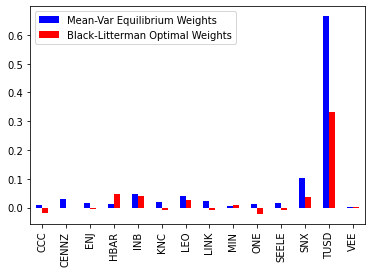

In [58]:
r_eq_2 = r_eq + np.dot(np.dot(tau*np.dot(cov, P.T), np.linalg.inv(tau*np.dot(np.dot(P, cov), P.T)+Omega)), (Q-np.dot(P,r_eq)))


cov_2 = cov + tau*cov - tau*np.dot(np.dot(np.dot(cov,P.T), np.linalg.inv(tau*np.dot(np.dot(P,cov),P.T)+Omega)), tau*np.dot(P,cov))

w_opt = np.dot(np.linalg.inv(lmda*cov_2),r_eq_2)


df = pd.DataFrame([w_mkt.reshape(len(weights)), w_opt.reshape(len(weights))],
                  columns=weights.index.tolist(),
                  index=['Mean-Var Equilibrium Weights','Black-Litterman Optimal Weights'])

df.T.plot(kind='bar', color='br')

# change in weights:

ch = w_opt - w_mkt


for i in range(len(ch)):
    #print(weights.index[i]," ---->", "Expected return=", r_eq[i]*100, "Stdev=", cov[i,i]*100)    
    print(weights.index[i]," ----->", "Rebalance(%):", ch[i]*100, "-----> Opt Weight:", w_opt[i]*100)


# Now adding no shorts constraint and also max allocation per asset of 35% 

In [60]:
too_short = []
too_long = []



for i in range(14):
  if w_opt[i] <0:

    too_short = np.append(too_short, w_opt[i])
    w_opt[i]=0

  elif w_opt[i] >0.35:

    too_long = np.append(too_long, w_opt[i]-0.35)
    w_opt[i] = 0.35


    

#print(w_opt)
pct_shorted = -np.sum(too_short)
pct_excess_long = np.sum(too_long)
remains = pct_shorted+pct_excess_long

print("Percent Initially Shorted=", pct_shorted)
print("Excess Long based on 35% constraint=", pct_excess_long)
print("Remaining to Allocate=", remains)


Percent Initially Shorted= -0.0
Excess Long based on 35% constraint= 0.0
Remaining to Allocate= 0.0


# The Views (Delta) say that: 


CCC  -----> Rebalance(%): [-2.98034863] -----> Opt Weight: [0.]
CENNZ  -----> Rebalance(%): [-3.28313565] -----> Opt Weight: [0.]
ENJ  -----> Rebalance(%): [-2.14579803] -----> Opt Weight: [0.]
HBAR  -----> Rebalance(%): [3.3206463] -----> Opt Weight: [4.6256463]
INB  -----> Rebalance(%): [-0.75345987] -----> Opt Weight: [3.85454013]
KNC  -----> Rebalance(%): [-2.96132785] -----> Opt Weight: [0.]
LEO  -----> Rebalance(%): [-1.36442906] -----> Opt Weight: [2.53457094]
LINK  -----> Rebalance(%): [-3.08143832] -----> Opt Weight: [0.]
MIN  -----> Rebalance(%): [0.07574182] -----> Opt Weight: [0.74874182]
ONE  -----> Rebalance(%): [-3.43588651] -----> Opt Weight: [0.]
SEELE  -----> Rebalance(%): [-2.45495471] -----> Opt Weight: [0.]
SNX  -----> Rebalance(%): [-6.40535044] -----> Opt Weight: [3.82164956]
TUSD  -----> Rebalance(%): [-33.44732391] -----> Opt Weight: [33.04767609]
VEE  -----> Rebalance(%): [0.17684338] -----> Opt Weight: [0.30684338]
[0.48939668]


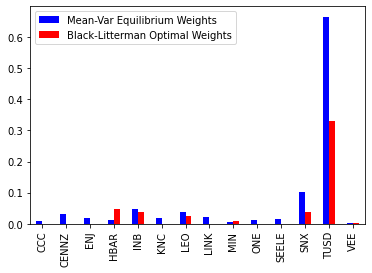

In [61]:
w_opt_equal = w_opt+(remains/14)



df = pd.DataFrame([w_mkt.reshape(len(weights)), w_opt.reshape(len(weights))],
                  columns=weights.index.tolist(),
                  index=['Mean-Var Equilibrium Weights','Black-Litterman Optimal Weights'])

df.T.plot(kind='bar', color='br')

# change in weights:

ch_equal = w_opt_equal - w_mkt

for i in range(len(ch)):
    print(weights.index[i]," ----->", "Rebalance(%):", ch[i]*100, "-----> Opt Weight:", w_opt[i]*100)
    
print(sum(w_opt_equal))

In [ ]:
## Now adding proportionally to the DELTA:
# 2- Invest the remaining amount proportionally to the views

D = np.array([ [0.01],[0.01],[0.092], [0.026], [0.092], [0.021], [0.016], [0.013], [-0.001], [0.017], [0.115], [0.039], [-0.005], [0.035], [0.055], [0.023], [-0.002], [0.078], [0.058]])

propor = D/sum(D)

w_opt_propor = w_opt + propor*remains

df = pd.DataFrame([w_mkt.reshape(19), w_opt_propor.reshape(19)],
                  columns=['BTC','ETH','MATIC','MKR','STX','ATOM','DASH','NEO','BNB','ZEC','AE','DCR','ADA','ZIL','WAVES','ZRX','XMR','ZEN','HOT'],
                  index=['Mean-Var Equilibrium Weights','Black-Litterman Optimal Weights'])

df.T.plot(kind='bar', color='br')

# change in weights:

ch_propor = w_opt_propor - w_mkt

print("BTC ----->", "Rebalance(%):", ch_propor[0]*100, "-----> Opt Weight:", w_opt_propor[0]*100)
print("ETH ----->", "Rebalance(%):", ch_propor[1]*100, "-----> Opt Weight:", w_opt_propor[1]*100)
print("MATIC ----->", "Rebalance(%):", ch_propor[2]*100,  "-----> Opt Weight:", w_opt_propor[2]*100)
print("MKR ----->", "Rebalance(%):", ch_propor[3]*100,  "-----> Opt Weight:", w_opt_propor[3]*100)
print("STX ----->", "Rebalance(%):", ch_propor[4]*100,  "-----> Opt Weight:", w_opt_propor[4]*100)
print("ATOM ----->", "Rebalance(%):", ch_propor[5]*100,  "-----> Opt Weight:", w_opt_propor[5]*100)
print("DASH ----->", "Rebalance(%):", ch_propor[6]*100,  "-----> Opt Weight:", w_opt_propor[6]*100)
print("NEO ----->", "Rebalance(%):", ch_propor[7]*100, "-----> Opt Weight:", w_opt_propor[7]*100)
print("BNB ----->", "Rebalance(%):", ch_propor[8]*100, "-----> Opt Weight:", w_opt_propor[8]*100)
print("ZEC ----->", "Rebalance(%):", ch_propor[9]*100, "-----> Opt Weight:", w_opt_propor[9]*100)

print("AE ----->", "Rebalance(%):", ch_propor[10]*100, "-----> Opt Weight:", w_opt_propor[10]*100)
print("DCR ----->", "Rebalance(%):", ch_propor[11]*100, "-----> Opt Weight:", w_opt_propor[11]*100)
print("ADA ----->", "Rebalance(%):", ch_propor[12]*100, "-----> Opt Weight:", w_opt_propor[12]*100)
print("ZIL ----->", "Rebalance(%):", ch_propor[13]*100, "-----> Opt Weight:", w_opt_propor[13]*100)
print("WAVES ----->", "Rebalance(%):", ch_propor[14]*100, "-----> Opt Weight:", w_opt_propor[14]*100)
print("ZRX ----->", "Rebalance(%):", ch_propor[15]*100, "-----> Opt Weight:", w_opt_propor[15]*100)
print("XMR ----->", "Rebalance(%):", ch_propor[16]*100, "-----> Opt Weight:", w_opt_propor[16]*100)
print("ZEN ----->", "Rebalance(%):", ch_propor[17]*100, "-----> Opt Weight:", w_opt_propor[17]*100)
print("HOT ----->", "Rebalance(%):", ch_propor[18]*100, "-----> Opt Weight:", w_opt_propor[18]*100)

#print(sum(w_opt_propor))